<a href="https://colab.research.google.com/github/simonowuor8/datasciencecoursera/blob/main/Copy_of_Correct_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The purpose of this project is help a real world organization make data driven business decisions by analyzing the provided Linkedin data in the light of the questions provided by the business owner.

*DATA IMPORTATION*.
In this section I viewed the data and the types of variables

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import matplotlib.pyplot as plt

# Load the LinkedIn data from the CSV file into a DataFrame
cameronData = pd.read_csv('CameronData.csv')


Saving CameronData.csv to CameronData.csv


In [ ]:
# Print the column names in the DataFrame
print(cameronData.columns)


Index(['Index', 'Posting', 'PosterName', 'PostingDate', 'NumberofLikes',
       'NumberofComments', 'NumberofReposts', 'NumberofOrganicImpressions',
       'Comments', 'Commenters'],
      dtype='object')


QUESTION 1

What is the engagement level of my LinkedIn posts and updates? Analyze the
descriptive statistics regarding likes, comments, and shares

*In this section, you can use any method among these two approaches.*

In [ ]:
#APPROACH 1
# Calculate descriptive statistics for likes, comments, and shares
engagement_stats = cameronData[['NumberofLikes', 'NumberofComments', 'NumberofReposts']].describe()
print("Descriptive Statistics:")
print(engagement_stats)


Descriptive Statistics:
       NumberofLikes  NumberofComments  NumberofReposts
count      84.000000         84.000000        84.000000
mean       11.833333          1.654762         2.642857
std        14.027369          3.931627         2.595839
min         0.000000          0.000000         0.000000
25%         5.000000          0.000000         1.000000
50%         9.000000          1.000000         2.000000
75%        13.250000          2.000000         3.250000
max       108.000000         33.000000        10.000000


In [ ]:
#APPROACH 2
# Calculate descriptive statistics for likes, comments, and NumberofReposts
likes_stats = cameronData["NumberofLikes"].describe()
comments_stats = cameronData["NumberofComments"].describe()
shares_stats = cameronData["NumberofReposts"].describe()

# Print the descriptive statistics
print("NumberofLikes:")
print(likes_stats)
print("\nNumberofComments:")
print(comments_stats)
print("\nNumberofReposts:")
print(shares_stats)

NumberofLikes:
count     84.000000
mean      11.833333
std       14.027369
min        0.000000
25%        5.000000
50%        9.000000
75%       13.250000
max      108.000000
Name: NumberofLikes, dtype: float64

NumberofComments:
count    84.000000
mean      1.654762
std       3.931627
min       0.000000
25%       0.000000
50%       1.000000
75%       2.000000
max      33.000000
Name: NumberofComments, dtype: float64

NumberofReposts:
count    84.000000
mean      2.642857
std       2.595839
min       0.000000
25%       1.000000
50%       2.000000
75%       3.250000
max      10.000000
Name: NumberofReposts, dtype: float64


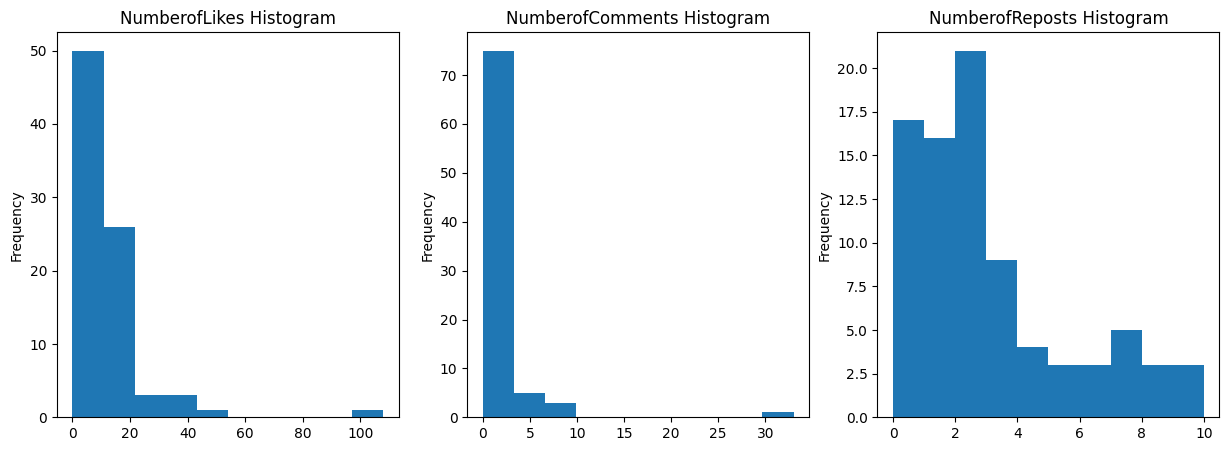

In [ ]:
# Create histograms for likes, comments, and shares
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
cameronData['NumberofLikes'].plot(kind='hist', ax=axes[0], title='NumberofLikes')
cameronData['NumberofComments'].plot(kind='hist', ax=axes[1], title='NumberofComments')
cameronData['NumberofReposts'].plot(kind='hist', ax=axes[2], title='NumberofReposts')

# Show the plots
plt.show()

QUESTION 2

Who are the most influential connections in my network? Identify individuals with a large following or high engagement rates who may be valuable for networking or collaboration.

In [ ]:
# Define criteria for influential connections
follower_threshold = 11  # I used the cut off to be 11 since its the mean
engagement_threshold = 2  # I used 2 as the mean for both comments and repost

# Filter and sort the dataset based on the defined criteria
influential_connections = cameronData[
    (cameronData['NumberofLikes'] >= follower_threshold) |
    (cameronData['NumberofComments'] >= engagement_threshold) |
    (cameronData['NumberofReposts'] >= engagement_threshold)
]

# Sort the influential connections by the "Commenters" column in descending order
sorted_influential_commenters = influential_connections.sort_values(
    by=['Commenters'],
    ascending=False
)

# Print only the "Commenters" column
print("Most Influential Commenters:")
print(sorted_influential_commenters["Commenters"])

Most Influential Commenters:
3                                           TigerLaunch
83     StartupSac, Startup Challenge, Startup Challenge
74                                           StartupSac
29      Ryan Radcliff, Kincy Clark, David Webb, Dom Nai
58      Ronald Flores, Franklin Burris, Arelene Miranda
78                    Rich ForemanView, Franklin Burris
69                                           Obi Baratt
31                                        Nina Essandoh
45                             Neal Best, Samuel Taylor
72    Maria Butler,Maria Butler,Maria Butler,Maria B...
79    Mari-Lyn Harris, Franklin Burris, Carlsen Cent...
50                  Laura Good, June Swatzell, Pam Kaur
32    Kincy Clark, Cameron Law, Dick Gourley, Camero...
44                        Joel Higginbotham, StartupSac
16    Isaac Brown,Carsen Center of Innovation & Entr...
75                                       George Parrish
55                    Franklin Burris, Wesley Alexander
41    Franklin Burr

QUESTION 3

How has my network expanded through influential connections? Analyze the growth of your network after connecting with influential individuals.

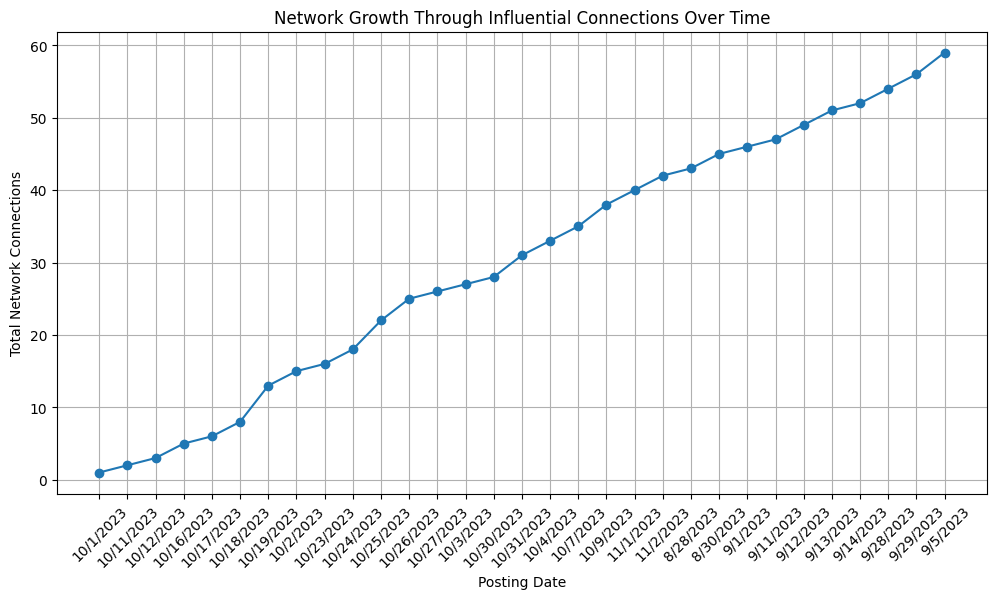

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the dataset to include only influential connections
follower_threshold = 11
engagement_threshold = 2
influential_connections = cameronData[
    (cameronData['NumberofLikes'] >= follower_threshold) |
    (cameronData['NumberofComments'] >= engagement_threshold) |
    (cameronData['NumberofReposts'] >= engagement_threshold)
]

# Sort the influential connections by the posting date
sorted_influential_connections = influential_connections.sort_values(by=['PostingDate'])

# Calculate the growth of your network over time
network_growth = sorted_influential_connections.groupby('PostingDate').size().cumsum()

# Plot the network growth
plt.figure(figsize=(12, 6))
plt.plot(network_growth.index, network_growth.values, marker='o', linestyle='-')
plt.title('Network Growth Through Influential Connections Over Time')
plt.xlabel('Posting Date')
plt.ylabel('Total Network Connections')
plt.xticks(rotation=45)
plt.grid()
plt.show()